In [53]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
import math 
# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [69]:
columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
df = pd.DataFrame(np.random.randn(100, 26),columns=columns)

In [70]:
df

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,0.448006,-1.467141,-0.256548,0.509389,0.028735,0.174450,0.181636,0.505385,-0.381120,-1.893831,...,-0.829931,0.145524,0.570977,0.315921,-1.048434,1.236291,0.858418,0.248234,1.474288,-0.393625
1,1.028743,-0.082317,-1.354474,-1.359797,-1.162357,-2.402308,-0.175275,-0.831320,0.177079,0.527539,...,-0.683768,-0.229256,-1.587813,-0.157537,-0.808473,-0.012981,-0.368078,0.137950,1.781499,-1.308950
2,0.785189,1.221010,0.277526,-0.691313,-0.646453,1.003228,1.104747,0.596458,-0.892164,-1.668598,...,-0.316717,0.399632,0.491406,-0.168103,-2.096683,-1.499416,0.626991,0.939622,0.276509,1.217268
3,0.140570,-0.621357,-1.600192,0.368977,0.515720,-0.664180,0.553521,0.731628,0.573583,0.017654,...,-1.475591,0.954486,-0.301499,1.987236,1.719500,-0.266813,-1.694694,-0.330179,-0.427403,0.510984
4,1.067642,-1.551018,-0.188071,-1.075702,0.332457,-0.477819,-1.030071,1.117598,0.273947,0.270110,...,0.827031,-1.282250,-0.915226,-2.018150,-0.262992,0.563348,0.316715,0.217612,1.005175,0.724550
5,-0.064952,0.230793,-0.449137,0.742415,-0.412285,-0.004735,0.501904,1.303117,-1.036247,1.643037,...,1.097147,-0.290918,-1.493961,1.546817,-1.121583,-0.478595,0.860841,-0.489858,0.597584,-0.572049
6,1.892685,-1.635365,-0.395137,-0.767550,-1.302867,-0.777894,-0.090356,-0.544033,0.207306,-0.336634,...,0.447081,0.503233,-0.424983,-1.629471,-2.215114,-1.616619,0.369654,0.672153,-2.031139,-0.009668
7,-0.727021,-0.136106,0.062953,0.086288,-1.568377,0.895411,0.300376,-1.481375,-0.753617,-0.134987,...,-1.229299,-1.852205,1.241410,0.270637,-0.865526,-1.609613,1.158767,-0.680871,1.116021,0.607231
8,-0.825093,0.107544,-0.506081,-0.389786,-0.747054,2.534841,1.138079,-0.096862,-0.834052,1.720175,...,1.479365,-0.070708,1.581086,1.838704,2.179844,2.086456,1.269056,0.630025,0.293530,0.672381
9,-0.625754,-0.389634,0.050242,-0.424340,-0.108610,1.576371,0.052661,0.129902,-0.173698,-3.020058,...,-1.650905,1.207206,-0.718730,-0.842903,1.078216,-0.096278,-0.399317,0.500420,-1.513622,0.130978


In [71]:
from sklearn.cluster import KMeans
import numpy as np

In [72]:
X = df.as_matrix()

In [73]:
X

array([[ 0.44800619, -1.46714095, -0.25654824, ...,  0.24823442,
         1.47428788, -0.39362459],
       [ 1.02874297, -0.08231688, -1.35447444, ...,  0.13794978,
         1.78149941, -1.30894978],
       [ 0.78518941,  1.22100972,  0.27752607, ...,  0.93962154,
         0.27650896,  1.21726768],
       ..., 
       [-0.04466734,  1.09021702, -0.23678924, ..., -1.08202465,
        -0.65493036,  0.61306477],
       [-0.31028874,  0.29426686, -1.53812193, ...,  0.42957124,
         0.17112312,  0.50897223],
       [-0.24977893, -0.10826986,  0.13488114, ...,  0.41110363,
        -0.70151612,  0.89753333]])

In [74]:
kmeans = KMeans(n_clusters=10 , random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [75]:
label = kmeans.labels_
print(label)

[4 5 4 1 5 4 8 4 2 3 7 4 8 8 8 7 2 5 3 8 6 2 2 6 9 5 7 8 1 8 9 1 0 7 2 6 2
 8 4 2 8 8 4 3 6 2 8 4 2 2 2 6 2 2 3 8 7 7 6 5 1 5 2 1 5 7 4 5 2 6 5 6 1 7
 3 6 9 6 1 1 4 8 6 1 8 9 1 6 8 6 1 5 8 6 6 1 5 9 8 6]


In [76]:
y_kmeans = kmeans.predict(X)

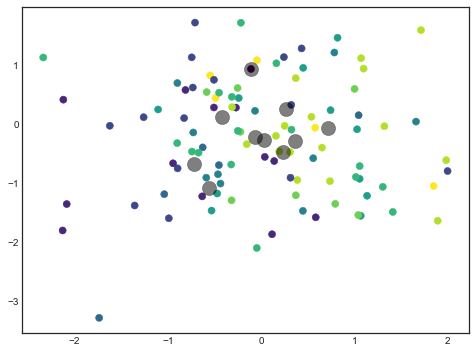

In [77]:
plt.scatter(X[:, 0], X[:, 1],c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [78]:
test = np.random.randn(1 , 26)
print(test)

[[-0.49938959  0.98966056 -1.46782527  0.99671011  0.40492221 -0.87720028
  -0.81704655 -0.78029019 -1.08371963 -0.01737197 -1.74023945 -1.52931053
   0.04543062 -1.2242754   1.17686118 -1.64842402 -1.27959797  0.90846929
   0.09565909 -1.97506659  0.58727725 -0.70544408  1.1072453  -1.0833191
  -0.14523161  0.1723427 ]]


In [79]:
kmeans.predict(test)

array([4])

In [80]:
centers = kmeans.cluster_centers_
print(centers)

[[-0.10850098  0.94176758  0.36256113 -0.38073754  0.59429647 -1.87864529
  -0.68581445 -0.52138248 -0.63710426  1.54700248  0.54585305 -0.43746816
   1.47891872 -1.37946216  1.35893703  2.67217009 -1.20773037  0.48344976
   0.02828948 -0.68277844  0.9620712   0.14739765 -0.16842788  1.23480908
  -1.0425498  -2.01712255]
 [-0.71711036 -0.67221401 -0.17472737  0.08262517  0.60537391  0.65026499
   0.43097964  0.13714527  0.62320969 -0.56607017  0.93527243  0.35180228
  -0.18508643 -0.70017715  0.39741885 -0.05506863 -0.23535994 -0.28392109
   0.16175479  0.66385184  0.62334654 -0.25307934 -0.48951105 -0.0144445
   0.08775834  0.83466662]
 [-0.42106551  0.12106903 -0.24402026  0.13890341 -0.61318736 -0.07361018
   0.38142186 -0.22428342  0.16494766  0.63767195 -0.30012326  0.30869114
  -0.10272945  0.62015536  0.26976051 -0.25603073  1.00084449  0.10006481
   0.34990758  0.40113742  0.35194754  0.5531495   0.02311761  0.436302
  -0.14660258  0.85834766]
 [-0.56114041 -1.07819554  0.46417

In [81]:
centers.shape

(10, 26)

In [82]:
label.shape

(100,)

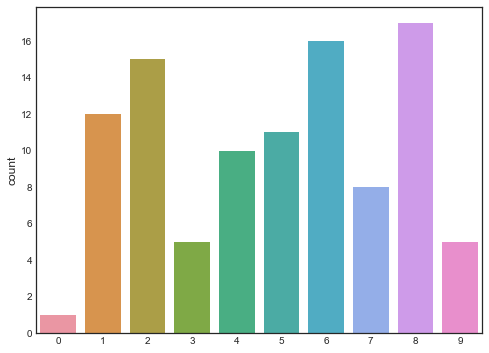

In [83]:
sns.countplot(x = label)